# Python Basics Exercise

本週的課程是介紹 Python 的基礎使用，以下有幾個練習，請完成這些練習，並且回答[作業上的問題](https://goo.gl/forms/JMu5PdM3DO3fxqtK2)。



## Exercise 1. 
Python 中的變數無需事先宣告，會在第一次指定內容時自動宣告。無論如何，Python 的變數命名仍有限制，例如某些系統保留字無法使用，而變數名稱也不能以數字開頭。以下是一些 Python 的保留字：

|Some Keywords|-|-       |-        |-      |
|------|--------|-------|--------|------|
|False |class   |finally|is      |return|
|None  |continue|for    |lambda  |try   |
|True  |def     |from   |nonlocal|while |
|and   |del     |global |not     |with  |
|as    |elif    |if     |or      |yield |
|assert|else    |import |pass    |      |
|break |except  |in     |raise   |      |

請嘗試定義幾個變數，看看什麼樣的變數名稱是合法的？

In [1]:
elif=1

SyntaxError: invalid syntax (<ipython-input-1-b0874b38614d>, line 1)

In [ ]:
assert=2

In [ ]:
6cities=6

In [ ]:
rockstar='John'

## Exercise 2. 

請用 `pandas.read_csv` 讀取 `../data/cwb_earthquake_20181101.csv`，內容是中央氣象局自2018年1月1日到11月1日的地震資料。請用這組資料回答以下問題：

In [2]:
import numpy as np
import pandas as pd

# 請用以下指令讀取檔案，由於檔案內含中文，或許需要指定編碼（encoding='utf-8'）

data = pd.read_csv('../data/cwb_earthquake_20181101.csv')
data.shape

(946, 7)

`pandas.read_csv` 會讀取資料檔案並且轉換成 `DataFrame` 物件，`DataFrame.keys()` 會顯示資料的欄位名稱。

In [3]:
data.keys()

Index(['編號', '地震時間', '經度', '緯度', '深度', '規模', '震央位置'], dtype='object')

在課堂的例子中，我們可以用 `matplotlib.pyplot.hist()` 來繪製 histogram，讓我們來看看 2018 年地震的 '經度', '緯度', '深度', '規模' 的分佈：

Text(0.5, 1.0, '震央緯度')

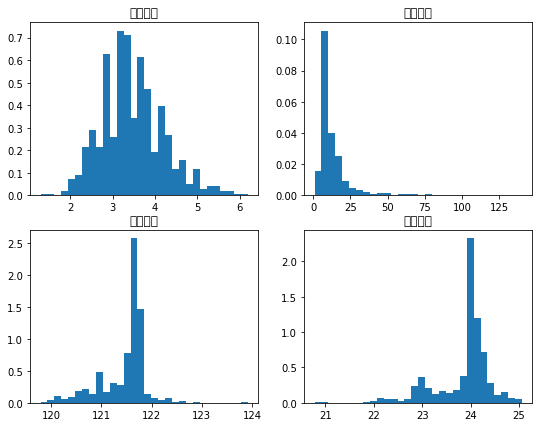

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(9, 7))
gs = gridspec.GridSpec(nrows=2, ncols=2)

#  地震規模
ax0 = fig.add_subplot(gs[0, 0])
ax0.hist(data['規模'], bins=30, density=True)
ax0.set_title('地震規模')

#  地震深度
ax0 = fig.add_subplot(gs[0, 1])
ax0.hist(data['深度'], bins=30, density=True)
ax0.set_title('地震深度')

#  震央經度
ax0 = fig.add_subplot(gs[1, 0])
ax0.hist(data['經度'], bins=30, density=True)
ax0.set_title('震央經度')

#  震央經度
ax0 = fig.add_subplot(gs[1, 1])
ax0.hist(data['緯度'], bins=30, density=True)
ax0.set_title('震央緯度')

## Exercise 3.

要在一串數字裡找到最大值，NumPy 提供了 `numpy.max()` 函數，而 Pandas 提供了 `pandas.Dataframe.max()` 函數，我們可以用任何一種方法知道這些資料裡最大的地震規模：
`data['規模'].max()` 或 `np.max(data['規模'])`

In [5]:
# 2018/01/01 - 2018/10/31 發生最大的地震規模是多少？
data['規模'].max()

6.2

## Exercise 4.

我們可以用 `data['規模'].max()` 找到最大的地震規模，也可以用 `data['規模'].idxmax()` 找到最大地震規模的那筆資料，然後用 `pandas.Dataframe.loc[index]` 來輸出這筆資料。

In [6]:
# 用 pandas.Dataframe.loc[index] 來輸出規模最大的地震
data.loc[data['規模'].idxmax()]

編號                             022   
地震時間             2018/2/6 下午 11:50:00
經度                             121.73
緯度                               24.1
深度                                6.3
規模                                6.2
震央位置    花蓮縣政府東北方  16.5  公里 (位於臺灣東部海域)
Name: 799, dtype: object

依據以上的例子，我們也可以用 `data['深度'].idxmin()` 找出震央深度最淺的地震

In [7]:
# 用 pandas.Dataframe.loc[index] 和 pandas.DataFrame.idxmin() 找出震央深度最淺的地震
data.loc[data['深度'].idxmin()]

編號                              103   
地震時間              2018/7/3 下午 05:20:00
經度                               120.9
緯度                               23.16
深度                                   1
規模                                 4.8
震央位置    臺東縣政府北偏西方  51.7  公里 (位於臺東縣海端鄉)
Name: 172, dtype: object

## Exercise 5.

利用 `pandas.Dataframe.mean()` 函數，我們可以快速計算某個資料欄位的平均值。下面的例子，我們把地震分成「偏東」和「偏西」兩類，分別計算他們的地震規模。

In [8]:
mean_lon = data['經度'].mean()
strength_east = data.loc[data['經度']>mean_lon, '規模'].mean()
strength_west = data.loc[data['經度']<=mean_lon, '規模'].mean()
print("Earthquake strength east of 121.5 E: " + str(strength_east))
print("Earthquake strength west of 121.5 E: " + str(strength_west))

Earthquake strength east of 121.5 E: 3.4771771771771767
Earthquake strength west of 121.5 E: 3.443928571428574


從初步結果來看，震央偏東和偏西的地震似乎在強度上沒有什麼差異。接下來，請依照上面的例子，計算規模大於平均和小於平均的地震，他們震央平均深度的差異：

In [9]:
mean_strength = data['規模'].mean()
depth_above_average = data.loc[data['規模']>mean_strength, '深度'].mean()
depth_bellow_average = data.loc[data['規模']<=mean_strength, '深度'].mean()
print("Average depth of strong earthquake: " + str(depth_above_average))
print("Average depth of weak earthquake: " + str(depth_bellow_average))
depth_above_average - depth_bellow_average

Average depth of strong earthquake: 17.277977528089878
Average depth of weak earthquake: 11.020958083832339


6.257019444257539